In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt 

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'


In [3]:
!wget $data -O data-chrun.csv 

--2025-10-10 21:47:25--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘data-chrun.csv’

data-chrun.csv      100%[===================>] 954.59K  3.73MB/s    in 0.2s    

2025-10-10 21:47:26 (3.73 MB/s) - ‘data-chrun.csv’ saved [977501/977501]



In [2]:
df = pd.read_csv("data-chrun.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.columns 

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df.columns  = df.columns.str.lower().str.replace(' ','_')

In [5]:
df.columns 

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [6]:
df.head().T

,0,1,2,3,4
customerid,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
seniorcitizen,0,0,0,0,0
partner,Yes,No,No,No,No
dependents,No,No,No,No,No
tenure,1,34,2,45,2
phoneservice,No,Yes,Yes,No,Yes
multiplelines,No phone service,No,No,No phone service,No
internetservice,DSL,DSL,DSL,DSL,Fiber optic
onlinesecurity,No,Yes,Yes,Yes,No


In [7]:
cat_columns = list(df.dtypes[df.dtypes == object].index)
cat_columns

['customerid',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'totalcharges',
 'churn']

In [8]:
for c in cat_columns: 
    df[c] = df[c].str.lower().str.replace(' ', '_')
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [9]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [10]:
df['totalcharges'] = pd.to_numeric(df['totalcharges'],errors='coerce')


In [11]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [12]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                object
dtype: object

In [13]:
df['totalcharges'].isnull().sum()

np.int64(11)

In [14]:
df['totalcharges'] = df['totalcharges'].fillna(0)

In [15]:
df['totalcharges'].isnull().sum()

np.int64(0)

In [16]:
df.churn = (df.churn == 'yes').astype(int)

In [17]:
df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split


In [19]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [20]:
df_full_trian , df_test = train_test_split(df,test_size=0.2, random_state=1)

In [21]:
len(df_full_trian),len(df_test)

(5634, 1409)

In [22]:
df_train , df_val = train_test_split(df_full_trian,test_size=0.25, random_state=1)

In [23]:
len(df_train),len(df_test),len(df_val)

(4225, 1409, 1409)

In [24]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [25]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values


In [26]:
del df_train['churn']

In [27]:
del df_val['churn']
del df_test['churn']

In [28]:
df_full_trian = df_full_trian.reset_index(drop=True)

In [29]:
df_full_trian.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [30]:
df_full_trian.churn.value_counts()

churn
0    4113
1    1521
Name: count, dtype: int64

# EDA

In [31]:
df_full_trian = df_full_trian.reset_index(drop=True)
df_full_trian.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [32]:
df_full_trian.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [33]:
global_churn = df_full_trian.churn.mean()
global_churn

np.float64(0.26996805111821087)

In [34]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']
categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]


In [35]:
df_full_trian[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

# Feature importance: Churn rate and risk ratio

## Churn rate

In [36]:
churn_female = df_full_trian[df_full_trian.gender=='female'].churn.mean()
churn_female

np.float64(0.27682403433476394)

In [37]:
churn_male = df_full_trian[df_full_trian.gender=='male'].churn.mean()
churn_male

np.float64(0.2632135306553911)

In [38]:
df_full_trian.partner.value_counts()

partner
no     2932
yes    2702
Name: count, dtype: int64

In [39]:
churn_partner = df_full_trian[df_full_trian.partner=='yes'].churn.mean()
churn_partner

np.float64(0.20503330866025166)

In [40]:
churn_no_partner = df_full_trian[df_full_trian.partner=='no'].churn.mean()
churn_no_partner

np.float64(0.3298090040927694)

## Risk Rate

In [41]:
churn_no_partner/global_churn

np.float64(1.2216593879412643)

In [42]:
churn_partner/global_churn

np.float64(0.7594724924338315)

In [43]:
df_group = df_full_trian.groupby('gender').churn.agg(['mean','count'])
df_group['diff'] = df_group['mean']-global_churn 
df_group['risk'] = df_group['mean']/global_churn 
df_group

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


In [44]:
from IPython.display import display


In [45]:
for c in categorical : 
    print(c)
    df_group = df_full_trian.groupby(c).churn.agg(['mean','count'])
    df_group['diff'] = df_group['mean']-global_churn 
    df_group['risk'] = df_group['mean']/global_churn 
    display(df_group)
    print("=========")

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


## Feature importance: Mutual information


In [46]:
from sklearn.metrics import mutual_info_score

In [47]:
mutual_info_score(df_full_trian.contract, df_full_trian.churn)

0.0983203874041556

In [48]:
mutual_info_score(df_full_trian.gender, df_full_trian.churn)

0.0001174846211139946

In [49]:
mutual_info_score(df_full_trian.partner, df_full_trian.churn)

0.009967689095399745

In [50]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_trian.churn)

In [51]:
mi_score = df_full_trian[categorical].apply(mutual_info_churn_score)
mi_score.sort_values(ascending=False)


contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

## Feature importance: Correlation

In [52]:
df_full_trian[numerical]

,tenure,monthlycharges,totalcharges
0,12,19.70,258.35
1,42,73.90,3160.55
2,71,65.15,4681.75
3,71,85.45,6300.85
4,30,70.40,2044.75
...,...,...,...
5629,9,100.50,918.60
5630,60,19.95,1189.90
5631,28,105.70,2979.50
5632,2,54.40,114.10


In [53]:
df_full_trian[numerical].corrwith(df_full_trian.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [54]:
df_full_trian[df_full_trian.tenure <=2].churn.mean()

np.float64(0.5953420669577875)

In [55]:
df_full_trian[(df_full_trian.tenure >2 )& (df_full_trian.tenure <=12 )].churn.mean()

np.float64(0.3994413407821229)

In [56]:
df_full_trian[df_full_trian.tenure >12].churn.mean()

np.float64(0.17634908339788277)

In [57]:
df_full_trian[df_full_trian.monthlycharges <=20].churn.mean()

np.float64(0.08795411089866156)

In [58]:
df_full_trian[(df_full_trian.monthlycharges >20 )& (df_full_trian.monthlycharges <=50 )].churn.mean()

np.float64(0.18340943683409436)

In [59]:
df_full_trian[df_full_trian.monthlycharges >50].churn.mean()

np.float64(0.32499341585462205)

## One-hot encoding
-

In [60]:
from sklearn.feature_extraction import DictVectorizer 

In [61]:
df_train[['gender','contract']].iloc[:100].to_dict(orient='records')

[{'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'one_year'},
 {'gender': 'male', 'contract': 'two_year'},
 {

In [62]:
dicts = df_train[['gender','contract']].iloc[:100].to_dict(orient='records')

In [63]:
dv =DictVectorizer(sparse=False)

In [64]:
dv.fit(dicts)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [65]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'gender=female', 'gender=male'], dtype=object)

In [66]:
dv.transform(dicts)

array([[0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0.

In [67]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [68]:
x_train = dv.fit_transform(train_dicts)
x_val = dv.transform(val_dicts)

In [69]:
dv.transform(train_dicts)

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.20000e+01, 8.42515e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+01, 1.02155e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        5.00000e+00, 4.13650e+02],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        2.00000e+00, 1.90050e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        2.70000e+01, 7.61950e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        9.00000e+00, 7.51650e+02]], shape=(4225, 45))

## Logistic Regrssion

In [70]:
def sigmoid(z): 
    return 1 / (1 + np.exp(-z))

In [71]:
import matplotlib.pyplot as plt


In [72]:
z = np.linspace(-5,7,51)
z

array([-5.  , -4.76, -4.52, -4.28, -4.04, -3.8 , -3.56, -3.32, -3.08,
       -2.84, -2.6 , -2.36, -2.12, -1.88, -1.64, -1.4 , -1.16, -0.92,
       -0.68, -0.44, -0.2 ,  0.04,  0.28,  0.52,  0.76,  1.  ,  1.24,
        1.48,  1.72,  1.96,  2.2 ,  2.44,  2.68,  2.92,  3.16,  3.4 ,
        3.64,  3.88,  4.12,  4.36,  4.6 ,  4.84,  5.08,  5.32,  5.56,
        5.8 ,  6.04,  6.28,  6.52,  6.76,  7.  ])

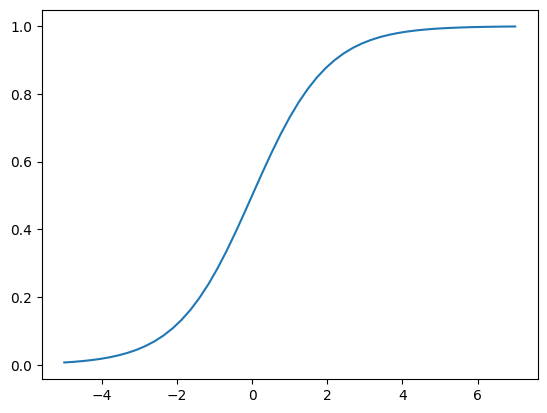

In [73]:
plt.plot(z,sigmoid(z))

In [74]:
def linear_regression(xi):
    result = w0 
    for j in range((len(w))):
        result = result + xi[j] * w[j]
    return result  

In [75]:
def logistic_regression(xi):
    score = w0 
    for j in range((len(w))):
        score = score + xi[j] * w[j]
    result = sigmoid(score)
    return result  

## Training logistic regression with Scikit-Learn


In [76]:
from sklearn.linear_model import LogisticRegression


In [77]:
model = LogisticRegression()
model.fit(x_train,y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [78]:
model.coef_[0]

array([ 5.64103371e-01, -1.53734240e-01, -5.19155705e-01, -1.32977867e-02,
       -9.54887881e-02,  7.12426185e-02, -9.82489918e-02, -8.17802015e-02,
       -3.25289351e-02, -7.62576397e-02, -3.53663464e-01,  3.43125881e-01,
       -9.82489918e-02,  2.07687059e-03, -2.50595389e-01,  1.62031166e-01,
       -2.02223516e-02,  6.55022995e-02, -9.82489918e-02, -7.60398825e-02,
        2.50662431e-01, -9.82489918e-02, -2.61200014e-01, -2.27866111e-01,
        1.19079536e-01, -1.21248632e-01,  1.24620575e-02, -9.49748454e-02,
       -3.02471209e-02,  4.49016038e-02, -2.84662123e-02,  1.62031166e-01,
       -2.70817741e-01,  2.20640249e-01, -9.73790420e-02, -9.82489918e-02,
        8.68414590e-02, -4.99556591e-02, -9.82489918e-02,  3.94180762e-02,
        1.94389753e-01, -9.82489918e-02, -2.04927336e-01, -7.21547204e-02,
        4.34177467e-04])

In [79]:
model.coef_[0].round(3)

array([ 0.564, -0.154, -0.519, -0.013, -0.095,  0.071, -0.098, -0.082,
       -0.033, -0.076, -0.354,  0.343, -0.098,  0.002, -0.251,  0.162,
       -0.02 ,  0.066, -0.098, -0.076,  0.251, -0.098, -0.261, -0.228,
        0.119, -0.121,  0.012, -0.095, -0.03 ,  0.045, -0.028,  0.162,
       -0.271,  0.221, -0.097, -0.098,  0.087, -0.05 , -0.098,  0.039,
        0.194, -0.098, -0.205, -0.072,  0.   ])

In [80]:
model.intercept_

array([-0.11092874])

In [81]:
model.intercept_[0]

np.float64(-0.1109287445794238)

In [82]:
model.predict(x_train)

array([0, 1, 1, ..., 1, 0, 1], shape=(4225,))

In [83]:
model.predict_proba(x_train)

array([[0.91088688, 0.08911312],
       [0.33128828, 0.66871172],
       [0.36229559, 0.63770441],
       ...,
       [0.48776317, 0.51223683],
       [0.96993479, 0.03006521],
       [0.2971009 , 0.7028991 ]], shape=(4225, 2))

In [84]:
y_pred =model.predict_proba(x_train)[:,1]

In [85]:
y_pred

array([0.08911312, 0.66871172, 0.63770441, ..., 0.51223683, 0.03006521,
       0.7028991 ], shape=(4225,))

In [86]:
y_pred =model.predict_proba(x_val)[:,1]
y_pred

array([0.00786347, 0.20992803, 0.2237105 , ..., 0.15014869, 0.77668113,
       0.81035774], shape=(1409,))

In [87]:
churn_decision = (y_pred > 0.5)

In [88]:
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 322, dtype: object

In [89]:
(y_val == churn_decision).mean()



np.float64(0.801277501774308)

## Model interpretation

In [90]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [91]:
model.coef_[0].round(3)

array([ 0.564, -0.154, -0.519, -0.013, -0.095,  0.071, -0.098, -0.082,
       -0.033, -0.076, -0.354,  0.343, -0.098,  0.002, -0.251,  0.162,
       -0.02 ,  0.066, -0.098, -0.076,  0.251, -0.098, -0.261, -0.228,
        0.119, -0.121,  0.012, -0.095, -0.03 ,  0.045, -0.028,  0.162,
       -0.271,  0.221, -0.097, -0.098,  0.087, -0.05 , -0.098,  0.039,
        0.194, -0.098, -0.205, -0.072,  0.   ])

In [92]:
dict(zip(dv.get_feature_names_out(),model.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.564),
 'contract=one_year': np.float64(-0.154),
 'contract=two_year': np.float64(-0.519),
 'dependents=no': np.float64(-0.013),
 'dependents=yes': np.float64(-0.095),
 'deviceprotection=no': np.float64(0.071),
 'deviceprotection=no_internet_service': np.float64(-0.098),
 'deviceprotection=yes': np.float64(-0.082),
 'gender=female': np.float64(-0.033),
 'gender=male': np.float64(-0.076),
 'internetservice=dsl': np.float64(-0.354),
 'internetservice=fiber_optic': np.float64(0.343),
 'internetservice=no': np.float64(-0.098),
 'monthlycharges': np.float64(0.002),
 'multiplelines=no': np.float64(-0.251),
 'multiplelines=no_phone_service': np.float64(0.162),
 'multiplelines=yes': np.float64(-0.02),
 'onlinebackup=no': np.float64(0.066),
 'onlinebackup=no_internet_service': np.float64(-0.098),
 'onlinebackup=yes': np.float64(-0.076),
 'onlinesecurity=no': np.float64(0.251),
 'onlinesecurity=no_internet_service': np.float64(-0.098),
 'onlinesecurity=yes

In [93]:
small = ['contract', 'tenure', 'monthlycharges']


In [94]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [95]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [96]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [97]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [98]:
x_train_small  = dv.transform(dicts_train_small)
x_train_small

array([[ 0.,  0.,  1., ...,  0., 72.,  0.],
       [ 1.,  0.,  0., ...,  0., 10.,  0.],
       [ 1.,  0.,  0., ...,  0.,  5.,  0.],
       ...,
       [ 1.,  0.,  0., ...,  0.,  2.,  0.],
       [ 0.,  0.,  1., ...,  0., 27.,  0.],
       [ 1.,  0.,  0., ...,  0.,  9.,  0.]], shape=(4225, 45))

In [99]:
model_small = LogisticRegression()
model_small.fit(x_train_small,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [100]:
w0 = model_small.intercept_[0]
w0

np.float64(-2.477957595411472)

In [101]:
w = model_small.coef_[0]
w.round(3)

array([ 0.971, -0.024, -0.948,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.027,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   , -0.036,  0.   ])

In [102]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))


{'contract=month-to-month': np.float64(0.971),
 'contract=one_year': np.float64(-0.024),
 'contract=two_year': np.float64(-0.948),
 'monthlycharges': np.float64(0.0),
 'tenure': np.float64(0.0)}

##  Using the model

In [103]:
dicts_full_train = df_full_trian[categorical + numerical].to_dict(orient='records')

In [104]:
dv = DictVectorizer(sparse=False)
x_train_full = dv.fit_transform(dicts_full_train)


In [105]:
y_train_full = df_full_trian.churn.values

In [106]:
model = LogisticRegression()
model.fit(x_train_full, y_train_full)


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [107]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')
x_test = dv.transform(dicts_test)


In [108]:
y_pred = model.predict_proba(x_test)[:,1]
y_pred

array([0.05704183, 0.12942998, 0.32184304, ..., 0.00652234, 0.19165844,
       0.66134701], shape=(1409,))

In [109]:
churn_decision = (y_pred >= 0.5)


In [110]:
(churn_decision == y_test).mean()


np.float64(0.8140525195173882)

## Accuracy and dummy model


In [2]:
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('data-chrun.csv')

df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)

In [4]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [5]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]


In [6]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [7]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

np.float64(0.801277501774308)

In [8]:
accuracy_score(y_val, y_pred >= 0.5)


0.801277501774308

In [9]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.509
0.10 0.598
0.15 0.664
0.20 0.707
0.25 0.737
0.30 0.759
0.35 0.766
0.40 0.780
0.45 0.793
0.50 0.801
0.55 0.798
0.60 0.797
0.65 0.784
0.70 0.765
0.75 0.744
0.80 0.730
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


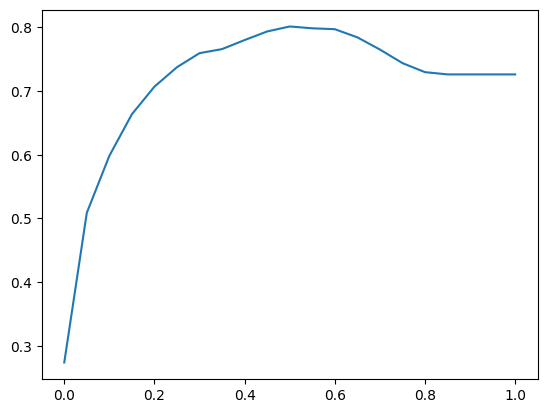

In [10]:
plt.plot(thresholds, scores)


In [11]:
from collections import Counter


In [12]:
Counter(y_pred >= 1.0)


Counter({np.False_: 1409})

In [13]:
1 - y_val.mean()


np.float64(0.7260468417317246)

## Confusion table


In [14]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [15]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [16]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [17]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[915, 108],
       [172, 214]])

In [18]:
(confusion_matrix/confusion_matrix.sum()).round(2)

array([[0.65, 0.08],
       [0.12, 0.15]])

## Precision and Recall

In [19]:
(tp+tn)/(tp+tn+fn+fp)

np.float64(0.801277501774308)

In [20]:
precision = tp / (tp+fp)

In [21]:
precision

np.float64(0.6645962732919255)

In [22]:
tp + fp

np.int64(322)

In [23]:
recal = tp / (tp+fn )

In [24]:
recal

np.float64(0.5544041450777202)

In [25]:
tp + fn, tp, fn

(np.int64(386), np.int64(214), np.int64(172))

## ROC Curves

In [26]:
tpr = tp/ (tp+fn)
tpr

np.float64(0.5544041450777202)

In [27]:
fpr = fp/(fp+tn)
fpr 

np.float64(0.10557184750733138)

In [28]:
scores = []
threshold = np.linspace(0,1)

for t in threshold: 
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    scores.append((t,tp,tn,fp,fn))

In [29]:
col = ['threshold', 'tp','tn','fp','fn']
df_scores = pd.DataFrame(scores,columns=col)
df_scores['tpr'] = df_scores.tp/ (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp/ (df_scores.fp + df_scores.tn)
df_scores

,threshold,tp,tn,fp,fn,tpr,fpr
0,0.000000,386,0,1023,0,1.000000,1.000000
1,0.020408,384,215,808,2,0.994819,0.789834
2,0.040816,380,318,705,6,0.984456,0.689150
3,0.061224,376,368,655,10,0.974093,0.640274
4,0.081633,371,426,597,15,0.961140,0.583578
5,0.102041,367,479,544,19,0.950777,0.531769
6,0.122449,363,525,498,23,0.940415,0.486804
7,0.142857,355,574,449,31,0.919689,0.438905
8,0.163265,347,609,414,39,0.898964,0.404692
9,0.183673,344,640,383,42,0.891192,0.374389


In [30]:
df_scores[::10]

,threshold,tp,tn,fp,fn,tpr,fpr
0,0.000000,386,0,1023,0,1.000000,1.000000
10,0.204082,331,666,357,55,0.857513,0.348974
20,0.408163,251,857,166,135,0.650259,0.162268
30,0.612245,140,975,48,246,0.362694,0.046921
40,0.816327,2,1023,0,384,0.005181,0.000000


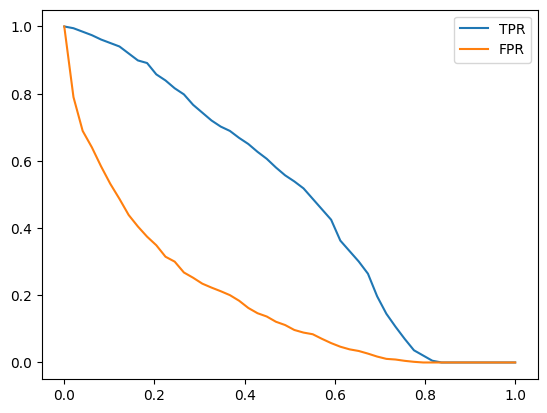

In [31]:
plt.plot(df_scores.threshold,df_scores['tpr'],label='TPR')
plt.plot(df_scores.threshold,df_scores['fpr'],label='FPR')
plt.legend()

## Random Model 

In [32]:
np.random.seed(1)
y_rand = np.random.uniform(0,1,size=len(y_val))
((y_rand>=0.5) == y_val)

array([ True, False,  True, ..., False, False, False], shape=(1409,))

In [33]:
((y_rand>=0.5) == y_val).mean()

np.float64(0.5017743080198722)

In [34]:
def trp_fpr_rand(y_val, y_pred): 
    scores = []
    threshold = np.linspace(0,1,101)
    for t in threshold: 
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)
        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()
        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()
        scores.append((t,tp,tn,fp,fn))
    col = ['threshold', 'tp','tn','fp','fn']
    df_scores = pd.DataFrame(scores,columns=col)
    df_scores['tpr'] = df_scores.tp/ (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp/ (df_scores.fp + df_scores.tn)
    return df_scores

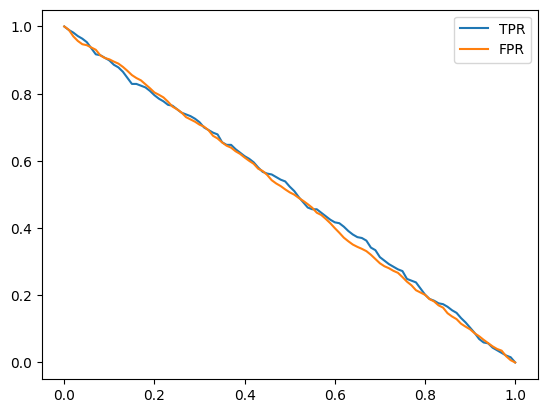

In [35]:

df_rand = trp_fpr_rand(y_val,y_rand)

plt.plot(df_rand.threshold,df_rand['tpr'],label='TPR')
plt.plot(df_rand.threshold,df_rand['fpr'],label='FPR')
plt.legend()

## ideal model

In [36]:
num_neg = (y_val == 0 ).sum()
num_pos = (y_val == 1 ).sum()

num_pos,num_neg

(np.int64(386), np.int64(1023))

In [37]:
y_ideal = np.repeat([0,1],[num_neg,num_pos])
y_ideal

array([0, 0, 0, ..., 1, 1, 1], shape=(1409,))

In [38]:
y_ideal_predict = np.linspace(0,1,len(y_val))

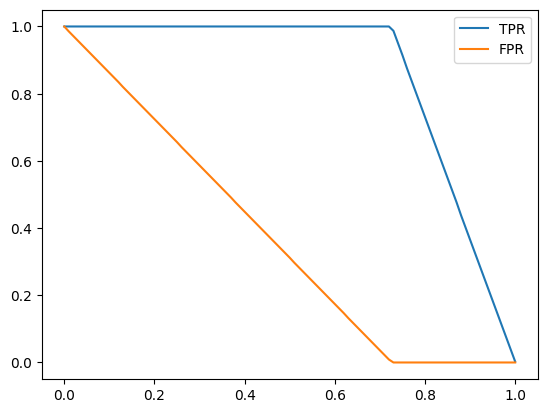

In [39]:

df_ideal = trp_fpr_rand(y_ideal,y_ideal_predict)

plt.plot(df_ideal.threshold,df_ideal['tpr'],label='TPR')
plt.plot(df_ideal.threshold,df_ideal['fpr'],label='FPR')
plt.legend()

## Putting all above model random, ideal and roc together  

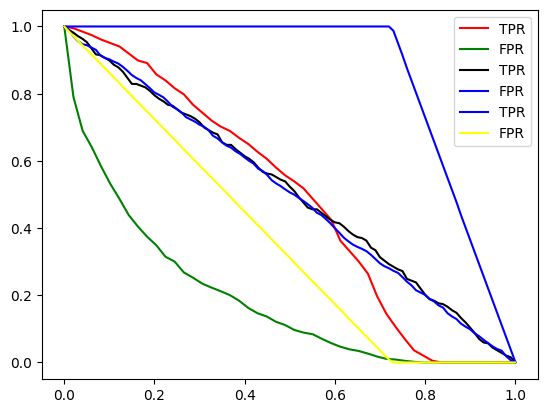

In [40]:
plt.plot(df_scores.threshold,df_scores['tpr'],label='TPR',color='red')
plt.plot(df_scores.threshold,df_scores['fpr'],label='FPR',color='green')
plt.plot(df_rand.threshold,df_rand['tpr'],label='TPR',color='black')
plt.plot(df_rand.threshold,df_rand['fpr'],label='FPR',color='blue')
plt.plot(df_ideal.threshold,df_ideal['tpr'],label='TPR',color='blue')
plt.plot(df_ideal.threshold,df_ideal['fpr'],label='FPR',color='yellow')
plt.legend()


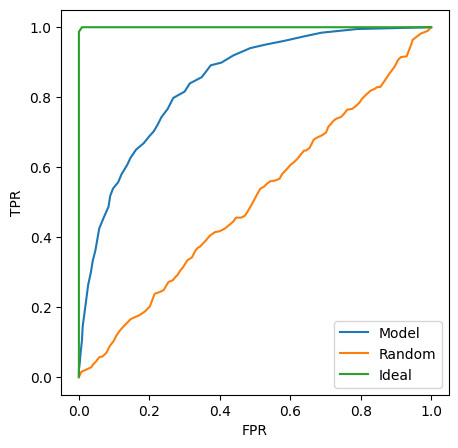

In [46]:
plt.figure(figsize=(5,5))
plt.plot(df_scores['fpr'], df_scores['tpr'],label='Model')
plt.plot(df_rand['fpr'], df_rand['tpr'],label='Random')
plt.plot(df_ideal['fpr'], df_ideal['tpr'],label='Ideal')
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()


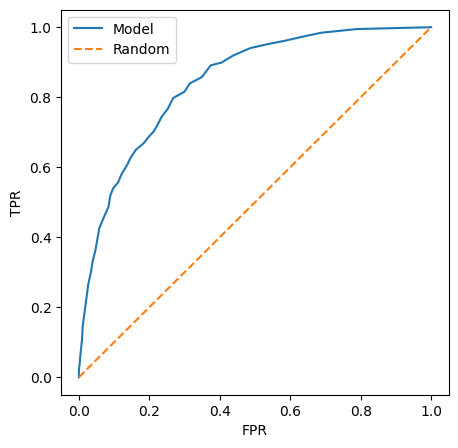

In [49]:
plt.figure(figsize=(5,5))
plt.plot(df_scores['fpr'], df_scores['tpr'],label='Model')
plt.plot([0,1],[0,1],label='Random',linestyle='--')
#plt.plot(df_ideal['fpr'], df_ideal['tpr'],label='Ideal')
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()


In [50]:
from sklearn.metrics import roc_curve 

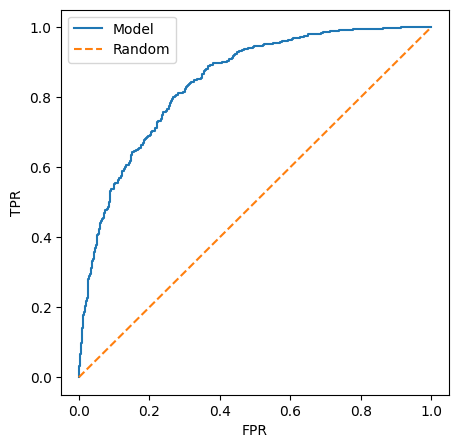

In [51]:
fpr,tpr, threshold =roc_curve(y_val, y_pred)
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr,label='Model')
plt.plot([0,1],[0,1],label='Random',linestyle='--')
#plt.plot(df_ideal['fpr'], df_ideal['tpr'],label='Ideal')
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

## ROC AUC 

In [52]:
from sklearn.metrics import auc 


In [53]:
auc(fpr,tpr)

0.8445038720820102

In [54]:
auc(df_scores.fpr,df_scores.tpr)

0.8438340449455275

In [56]:
from sklearn.metrics import roc_auc_score

In [57]:
roc_auc_score(y_val, y_pred)

0.8445038720820102

## Cross Validation 

In [58]:
def train(df_train, y_train): 
    dicts = df_train[categorical + numerical].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    x_train = dv.fit_transform(dicts)
    model = LogisticRegression()
    model.fit(x_train,y_train)
    return dv,model
    

In [59]:
dv, model = train(df_train, y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [74]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')
    x = dv.transform(dicts)
    y_pred = model.predict_proba(x)[:,1]
    return y_pred
    
y_pred = predict(df_val, dv, model)
y_pred
    

array([0.04517036, 0.02400952, 0.06110168, 0.03385882, 0.0870536 ,
       0.14612575, 0.11064286, 0.34115738, 0.30713884, 0.07250426,
       0.67597284, 0.30320653, 0.06440852, 0.20621329, 0.23029093,
       0.00691775, 0.12796383, 0.02147438, 0.19854145, 0.11635867,
       0.00346521, 0.28798539, 0.01836992, 0.07545561, 0.13723516,
       0.5299167 , 0.16201586, 0.63477702, 0.04143779, 0.00234155,
       0.30492033, 0.02886718, 0.09512718, 0.70835014, 0.0504465 ,
       0.54504156, 0.06656014, 0.01000475, 0.03729127, 0.01936674,
       0.74339553, 0.08421485, 0.19149518, 0.62649758, 0.11118636,
       0.01316322, 0.07201728, 0.65719732, 0.38117373, 0.05675421,
       0.6381365 , 0.46806219, 0.02152697, 0.7784159 , 0.76525007,
       0.43674729, 0.00211294, 0.04218238, 0.13788766, 0.44240312,
       0.00575102, 0.11176228, 0.2137553 , 0.03046678, 0.1989701 ,
       0.67091961, 0.18632769, 0.41277269, 0.59906993, 0.76385612,
       0.51208981, 0.43167677, 0.20872288, 0.00458998, 0.50353

In [79]:
!pip install tqdm 


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [82]:
from sklearn.model_selection import KFold
from tqdm.auto import tqdm 

In [83]:
kfold = KFold(n_splits = 10 , shuffle=True, random_state=1)

In [84]:
k_scores = []
for train_idx, val_idx in tqdm(kfold.split(df_full_train)):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
    y_train = df_train.churn.values
    y_val = df_val.churn.values

    dv, model = train(df_train,y_train)
    y_pred = predict(df_val,dv, model)
    auc = roc_auc_score(y_val, y_pred)
    k_scores.append(auc)
    
    
    
    
    

0it [00:00, ?it/s]

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

In [77]:
len(train_idx)

5071

In [85]:
k_scores

[0.8480670451473371,
 0.841042698019802,
 0.8557048652060528,
 0.8342276355855487,
 0.8265973945409429,
 0.8373459873459873,
 0.8445294692282644,
 0.8186195445920303,
 0.8452793834296726,
 0.863752478908272]

In [89]:
print('%.3f +- %.3f' %(np.mean(k_scores), np.std(k_scores)))

0.842 +- 0.013
